In [1]:
%%capture
!pip install -q hvplot
!pip install seaborn
!pip install scipy
!pip install matplotlib
!pip install sklearn

In [2]:
#import required packages.

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas




pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:

import random
import pickle

#Load Synthetic data 
data = pd.read_csv('data_tab_separated-large.csv',sep="\t")
#Load Original data  
TrainOrig=pd.read_csv('lending_club_loan_two.csv')

#Match the data size of the original data with the size of the synthetic data
TrainOrig=TrainOrig.sample(n=len(data))

term_values = {' 36 months': 36, ' 60 months': 60, '36 months':36, '60 months':60}

#Convert string to integers, i.e. 60 months to 60 for further processing for both datasets
data['term'] = data.term.map(term_values)
TrainOrig['term'] = TrainOrig.term.map(term_values)




# 🔍 Exploratory Data Analysis

> **OVERALL GOAL:** 
> - Get an understanding how well the synthetic data distribution matches the original data

# Employment length distribution
- This variable was not included in the seed instructions
- The distributions are different and LLM by itself does not produce diverse results.

/tmp/ipykernel_4111/3487424702.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90);
/tmp/ipykernel_4111/3487424702.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


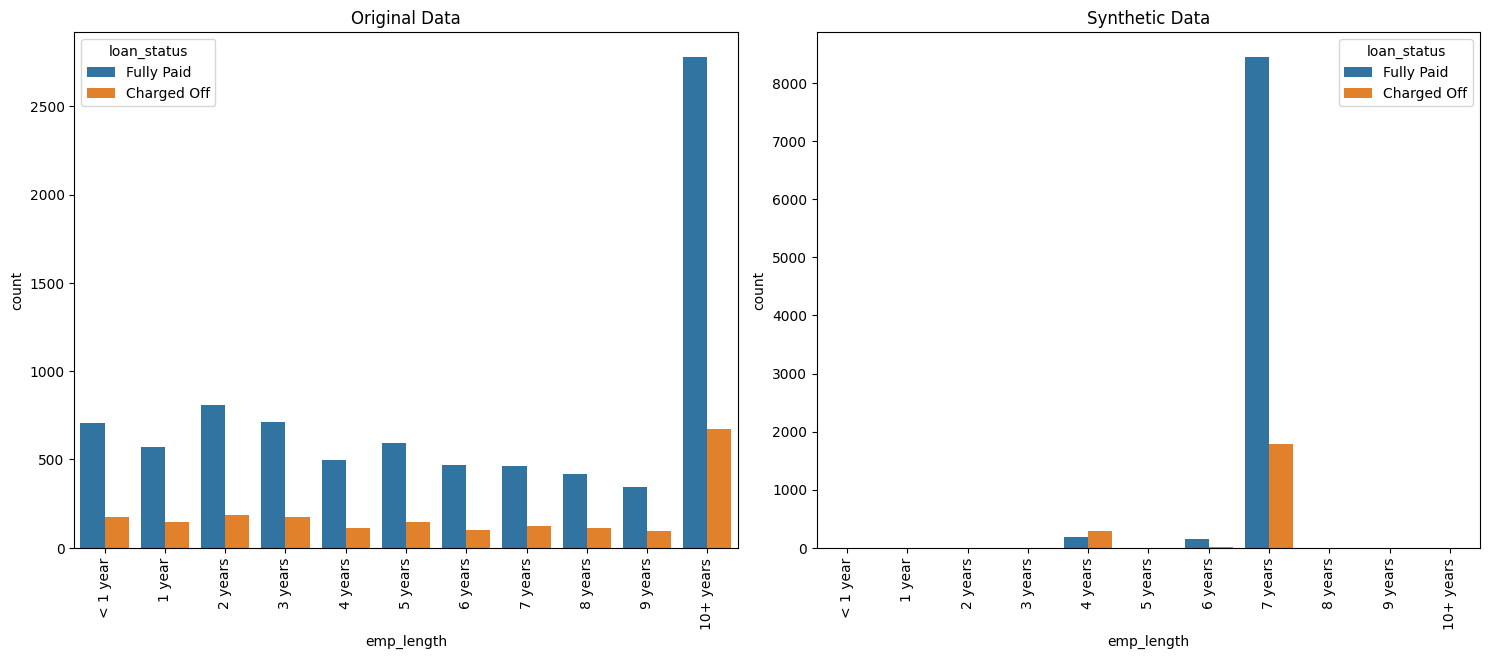

In [4]:
plt.figure(figsize=(15, 12))

ax1=plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=TrainOrig, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
ax1.set_title('Original Data')


ax2=plt.subplot(2, 2, 2)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
ax2.set_title('Synthetic Data')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.tight_layout()

# Loan Status Counts
- This variable takes two values, representing if the loan is fully paid or charged off.
- The distributions are similar.

In [5]:
right=data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts (Synthetic Data)", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)
left=TrainOrig['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts (Original Data)", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

left+right

:Layout
   .Bars.Count.I  :Bars   [loan_status]   (count)
   .Bars.Count.II :Bars   [loan_status]   (count)

# Loan Status by Grade
- This plot shows the conditional distribution of the grade given the loan status.
- The conditional distributions are similar.

Text(0.5, 1.0, 'Synthetic data')

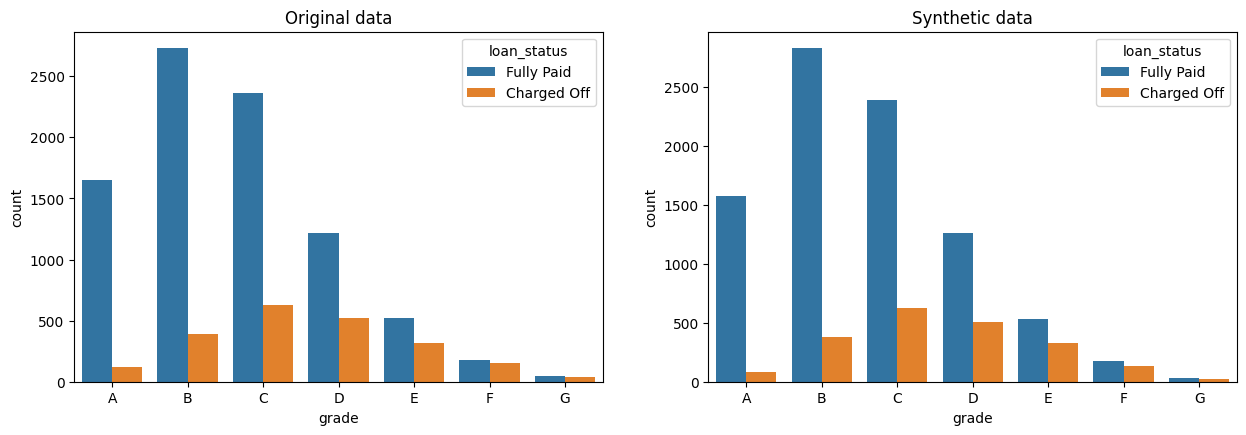

In [6]:
plt.figure(figsize=(15, 10))

ax1=plt.subplot(2, 2, 1)
grade = sorted(TrainOrig.grade.unique().tolist())
sns.countplot(x='grade', data=TrainOrig, hue='loan_status', order=grade,ax=ax1)
ax1.set_title('Original data')
ax2=plt.subplot(2, 2, 2)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade,ax=ax2)
ax2.set_title('Synthetic data')



# Loan Status by Grade on the infrequent values (F,G)
- This plot shows the conditional distribution of the grade given the loan status.
- The conditional distributions are similar but still diverge more than the  Loan Status by Grade plot which includes frequent values (A,B,C,D,E values).

['F', 'G']
['F', 'G']


(0.0, 200.0)

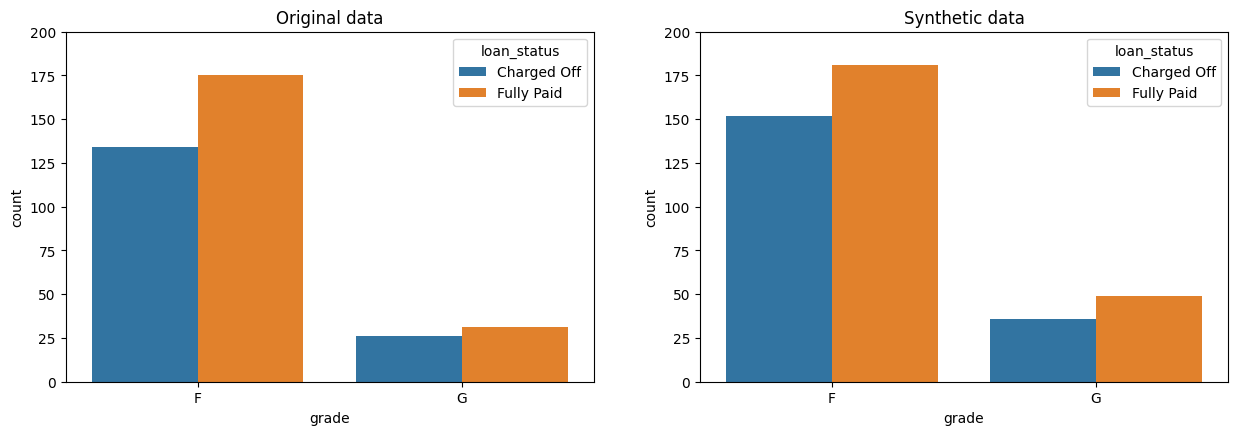

In [7]:
df = data[(data.grade == 'F') | (data.grade == 'G')]
dfOrig = TrainOrig[(TrainOrig.grade == 'F') | (TrainOrig.grade == 'G')]

plt.figure(figsize=(15, 10))
hue_order = sorted(df.loan_status.unique().tolist())


ax1=plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
print(grade)
sns.countplot(x='grade', data=df, hue='loan_status', order=grade,ax=ax1,hue_order=hue_order)
ax1.set_title('Original data')

ax2=plt.subplot(2, 2, 2)
grade = sorted(dfOrig.grade.unique().tolist())
print(grade)

sns.countplot(x='grade', data=dfOrig, hue='loan_status', order=grade,hue_order=hue_order)
ax2.set_title('Synthetic data')
ax2.set_ylim(top=200)
ax1.set_ylim(top=200)



# Loan Status by subgreade on the infrequent values (F,G)
- This plot shows the conditional distribution of the subgrade given the loan status.
- The conditional distributions  of synthetic and original data diverge more than the conditional distribution of the grade given the loan status above. This is likely due to the infrequent subgrades F1-5 and G1-5. Generating more data can resolve this discrepancy.

(0.0, 200.0)

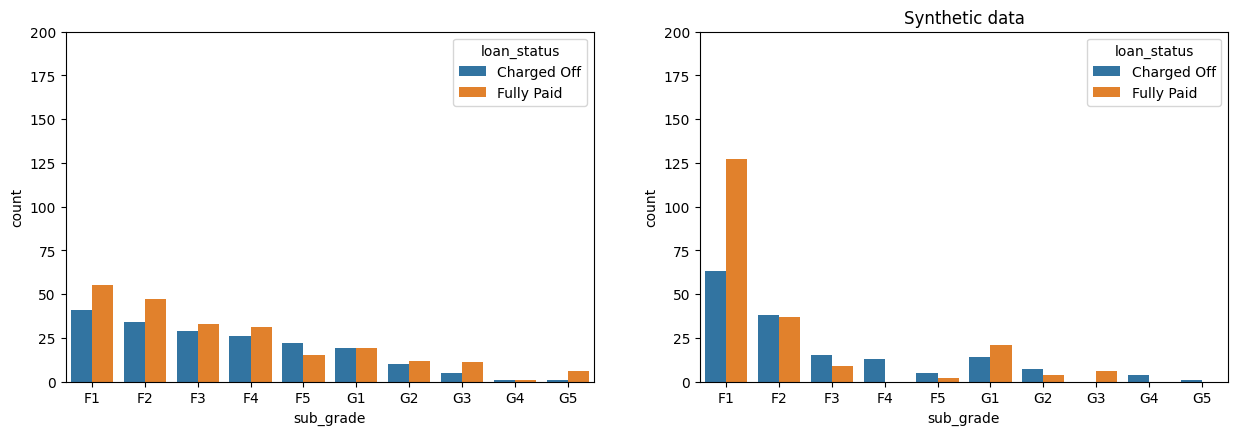

In [8]:
df = data[(data.grade == 'F') | (data.grade == 'G')]
dfOrig = TrainOrig[(TrainOrig.grade == 'F') | (TrainOrig.grade == 'G')]


plt.figure(figsize=(15, 10))
ax1=plt.subplot(2, 2, 1)
sub_grade = sorted(dfOrig.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=dfOrig, hue='loan_status', order=sub_grade)
ax1.set_ylim(top=200)
ax2=plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
ax2.set_title('Synthetic data')

ax2.set_ylim(top=200)


# Loan Status by Loan Amount, Loan Status by Installment, and Loan Status by Interest Rate
- This plot shows the conditional distribution of the loan amount given the loan status.
- The synthetic and original distribution means are similar while the spread of the synthetic data looks narrower. This might be due to the removal of the  infrequent classes by the clustering algorithm used for creating the seeds. To use the infrequent seeds, we have to generate more data. This might resolve the problem.
- We have similar observations for the  Loan Status by Installment plots and Loan status by interest rate in the following plot.

In [9]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', by='loan_status', subplots=False, width=500, height=350, 
    title="Loan Status by Loan Amount (Synthetic data)", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', by='loan_status', subplots=False, width=500, height=350, 
    title="Loan Status by Installment (Synthetic data)", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_boxLeft = TrainOrig.hvplot.box(
    y='loan_amnt', by='loan_status', subplots=False, width=500, height=350, 
    title="Loan Status by Loan Amount (Original Data)", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_boxLeft = TrainOrig.hvplot.box(
    y='installment', by='loan_status', subplots=False, width=500, height=350, 
    title="Loan Status by Installment (Original Data)", xlabel='Loan Status', ylabel='Installment'
)



# Combine into 2x2 grid
display(loan_amnt_boxLeft + loan_amnt_box) 
display(installment_boxLeft + installment_box)




int_rateLeft = TrainOrig.hvplot.box(
    y='int_rate', by='loan_status', bins=10, alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate (Original Data)", xlabel='Loans Counts', ylabel='Interest Rate', 
    legend='top',density=True
)


int_rate = data.hvplot.box(
    y='int_rate', by='loan_status', bins=10, alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate (Synthetic Data)", xlabel='Loans Counts', ylabel='Interest Rate', 
    legend='top',density=True
)



display(int_rateLeft  + int_rate)
#display(annual_incLeft  + annual_inc)



:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (loan_amnt)

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (installment)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (int_rate)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (int_rate)

# Loan Status by home ownership 
- Data look similar except for the infrequent value OWN


In [10]:

home_ownership = TrainOrig.home_ownership.value_counts().hvplot.bar(
    title='Loan Status by home owneship (Original data)', xlabel='Home Ownership', ylabel='Count', 
    width=500, height=350, legend='top',ylim=(0,10000)
).opts(xrotation=90)


home_ownershipRight = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by home owneship (Synthetic)", xlabel='Home Ownership', ylabel='Count', 
    width=500, height=350, legend='top',ylim=(0,10000)
).opts(xrotation=90)


home_ownership  + home_ownershipRight

:Layout
   .Bars.Count.I  :Bars   [home_ownership]   (count)
   .Bars.Count.II :Bars   [home_ownership]   (count)

# Term count distribution 
- Term count original and synthetic data distribution look similar.


Text(0.5, 1.0, 'Term count - Synthetic Data')

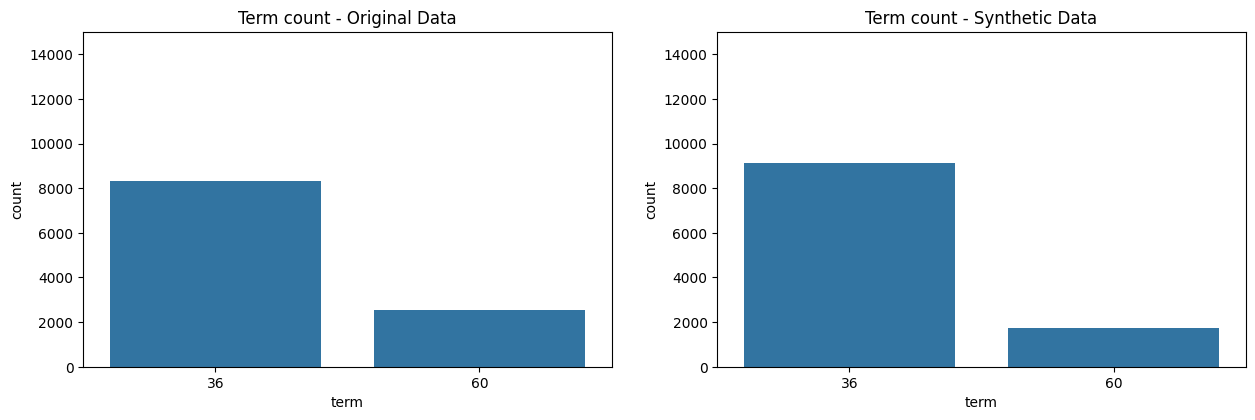

In [11]:
plt.figure(figsize=(15, 20))
ax1=plt.subplot(4, 2, 1)
sns.countplot(x='term', data=TrainOrig)
ax1.set_ylim(top=15000)
ax1.set_title('Term count - Original Data')
ax2=plt.subplot(4, 2, 2)
sns.countplot(x='term', data=data)
ax2.set_ylim(top=15000)
ax2.set_title('Term count - Synthetic Data')


# Loan status by Term count distribution 
- Conditional Term count  given the loan statuus original and synthetic data distributions look similar.


Text(0.5, 1.0, 'Loan Status by Term count - Synthetic Data')

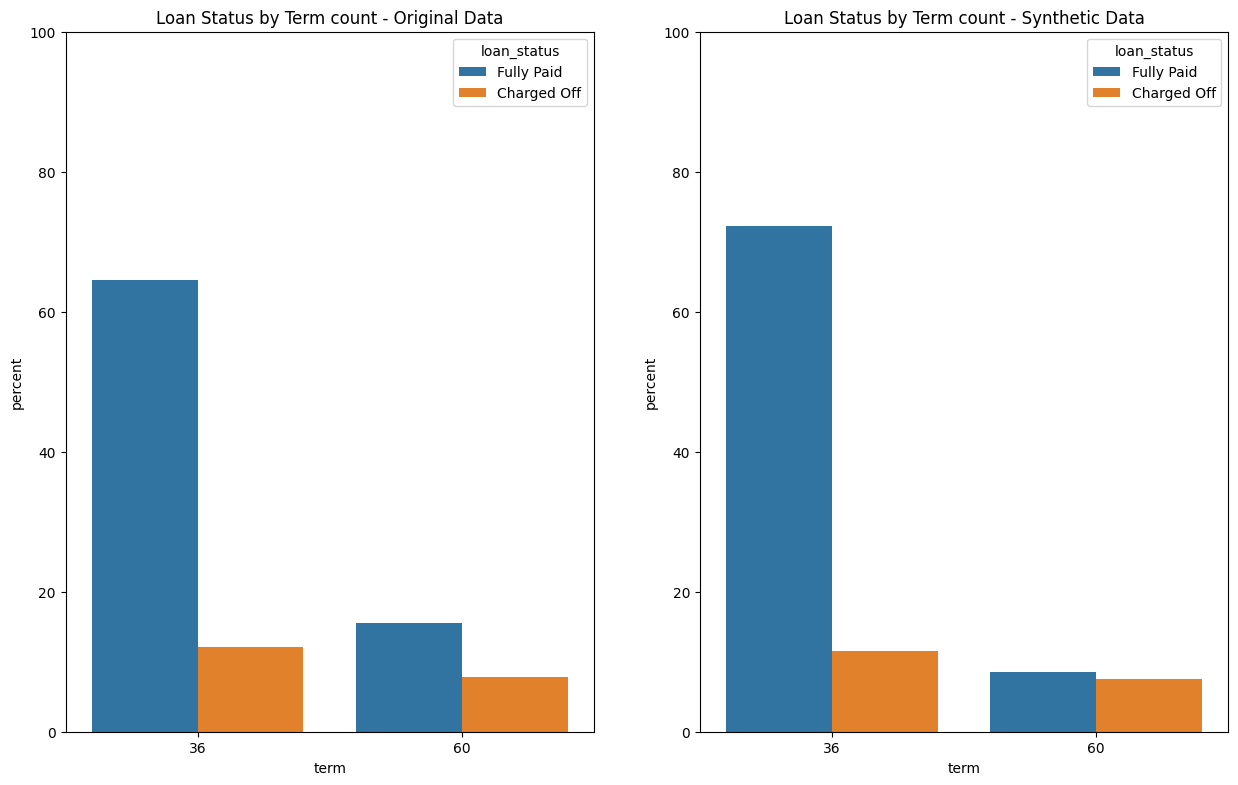

In [12]:
plt.figure(figsize=(15, 20))
ax1=plt.subplot(2, 2, 1)
sns.countplot(x='term', data=TrainOrig, hue='loan_status',stat='percent')
ax1.set_ylim(top=100)
ax1.set_title('Loan Status by Term count - Original Data')

ax2=plt.subplot(2, 2, 2)
sns.countplot(x='term', data=data, hue='loan_status',stat='percent')
ax2.set_ylim(top=100)
ax2.set_title('Loan Status by Term count - Synthetic Data')


# Loan Status by number of credit lines
- This plot shows the conditional distribution of the loan number of credit lines given the loan status.
- The synthetic and original distribution means are similar while the spread of the synthetic data distribution looks narrower. Similar to above, this might be due to the removal of the  infrequent classes by the clustering algorithm used for creating the seeds. To use the infrequent seeds, we have to generate more data. This might resolve the problem.


In [13]:

title="Loan Status by The number of open credit lines (Original data)"

left = TrainOrig.hvplot.hist(
    y='open_acc', by='loan_status', bins=10, width=600, height=500, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The number of open credit lines (Synthetic data)"
display(left)
right = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=10, width=600, height=500, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)


display(right)


:NdOverlay   [loan_status]
   :Histogram   [open_acc]   (Count)

:NdOverlay   [loan_status]
   :Histogram   [open_acc]   (Count)

# Number of derogatory public records, The initial listing status of the loan, and Number of public record bankruptcies
- We see similar distributions between the synthetic and original data distrubtions for Number of derogatory public records, The initial listing status of the loan, and Number of public record bankruptcies

In [14]:
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

Right=(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=600, height=400, legend_cols=2, legend_position='top_right'
)
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paidLeft = TrainOrig.loc[TrainOrig['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_offLeft = TrainOrig.loc[TrainOrig['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

Left=(fully_paidLeft * charged_offLeft).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=600, height=400, legend_cols=2, legend_position='top_right'
)
Left+Right

:Layout
   .Overlay.Count.I  :Overlay
      .Bars.Count.I  :Bars   [pub_rec]   (count)
      .Bars.Count.II :Bars   [pub_rec]   (count)
   .Overlay.Count.II :Overlay
      .Bars.Count.I  :Bars   [pub_rec]   (count)
      .Bars.Count.II :Bars   [pub_rec]   (count)

In [15]:
xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan (Synthetic data)"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

Right=(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=600, height=400, legend_cols=2, legend_position='top_right'
)

xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan (Original data)"

fully_paid = TrainOrig.loc[TrainOrig['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = TrainOrig.loc[TrainOrig['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

Left=(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=600, height=400, legend_cols=2, legend_position='top_right',ylim=(0,10000)
)
display(Left+Right)

:Layout
   .Overlay.Count.I  :Overlay
      .Bars.Count.I  :Bars   [initial_list_status]   (count)
      .Bars.Count.II :Bars   [initial_list_status]   (count)
   .Overlay.Count.II :Overlay
      .Bars.Count.I  :Bars   [initial_list_status]   (count)
      .Bars.Count.II :Bars   [initial_list_status]   (count)

In [16]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies (Original Data)"

fully_paid = TrainOrig.loc[TrainOrig['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar(label='Fully Paid') 
charged_off = TrainOrig.loc[TrainOrig['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar(label='Charged Off')

Left=(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=800, height=400, legend_cols=2, legend_position='top_right'
)

xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies (Synthetic data)"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar(label='Fully Paid') 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar(label='Charged Off')

Right=(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=800, height=400, legend_cols=2, legend_position='top_right', ylim=(0,10000)
)

Left+Right

:Layout
   .Overlay.I  :Overlay
      .Bars.Fully_Paid  :Bars   [pub_rec_bankruptcies]   (count)
      .Bars.Charged_Off :Bars   [pub_rec_bankruptcies]   (count)
   .Overlay.II :Overlay
      .Bars.Fully_Paid  :Bars   [pub_rec_bankruptcies]   (count)
      .Bars.Charged_Off :Bars   [pub_rec_bankruptcies]   (count)